**Part 1: Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

- Load the Dataset

In [ ]:
data = pd.read_csv('Netflix_Userbase.csv')
print(data.head())

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  


- Missing Values

In [ ]:
print(data.isnull().sum())

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


- Encode Categorical Variables

In [ ]:
data_encoded = pd.get_dummies(data, columns=['Subscription Type', 'Country', 'Gender', 'Device', 'Join Date', 'Last Payment Date', 'Plan Duration'])
print(data_encoded)


      User ID  Monthly Revenue  Age  Subscription Type_Basic  \
0           1               10   28                        1   
1           2               15   35                        0   
2           3               12   42                        0   
3           4               12   51                        0   
4           5               10   33                        1   
...       ...              ...  ...                      ...   
2495     2496               14   28                        0   
2496     2497               15   33                        1   
2497     2498               12   38                        0   
2498     2499               13   48                        0   
2499     2500               15   35                        1   

      Subscription Type_Premium  Subscription Type_Standard  \
0                             0                           0   
1                             1                           0   
2                             0           

- Feature Selection

In [ ]:
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies['Income'] = (data['Monthly Revenue']>1).astype(int)

x = data_dummies.drop(['Age', 'Monthly Revenue'], axis=1)
y = data_dummies['Income']

I picked 'Monthly Revenue' as the dependent variable because it is the only integer other than 'Age' that depends on other features like subscription type and plan duration.

**Part 2: Exploratory Data Analysis (EDA)**

- Descriptive Statistics

In [ ]:
data.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


- Visualizations

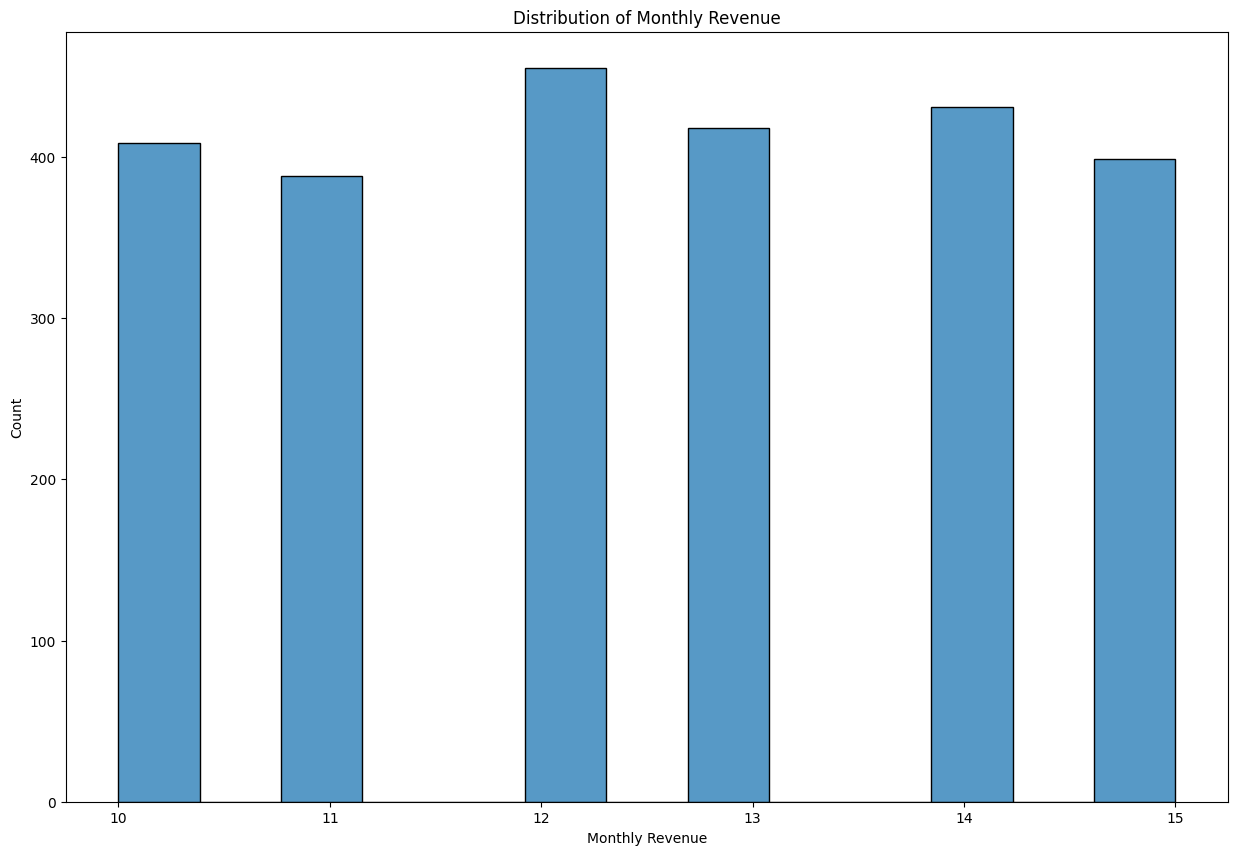

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Distribution of Monthly Revenue")
sns.histplot(x="Monthly Revenue", data=data, multiple='stack')
plt.show()

In [ ]:
country_counts = data['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'User Count']

fig = px.choropleth(country_counts, locations='Country', locationmode='country names',
                    color='User Count', hover_name='Country',
                    title=' User Demographics',
                    color_continuous_scale='Plasma')

fig.show()

**Part 3: Linear Regression Model (Predicting Monthly Revenue)**

- Build the Model

In [ ]:
x = data.drop('Monthly Revenue', axis=1)
y = data[['Age']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

model = LinearRegression()

In [ ]:
x = data[['Age']]
y = data['Monthly Revenue']


model = LinearRegression()
model.fit(x,y)

LinearRegression()

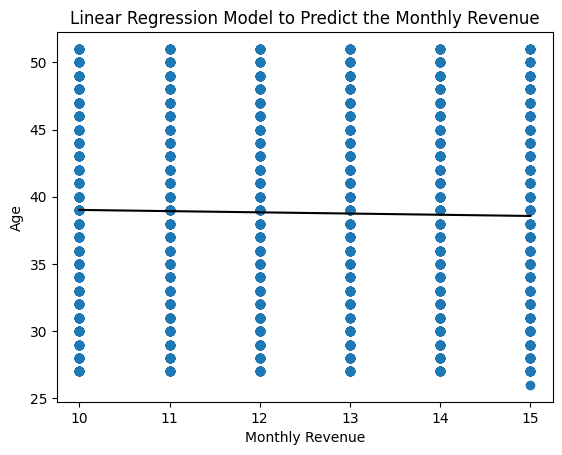

In [ ]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),color='Black')
plt.xlabel('Monthly Revenue')
plt.ylabel('Age')
plt.title('Linear Regression Model to Predict the Monthly Revenue')
plt.show()

In [ ]:
slope = model.coef_[0]
intercept = model.intercept_
print("Slope: ", slope)
print("Intercept: ", intercept)

Slope:  -0.08989220320414054
Intercept:  39.92000763455867


- Model Evaluation

In [ ]:
linear_reg_model = LinearRegression()

linear_reg_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
revenue_predictions = linear_reg_model.predict(x_test)

mse = mean_squared_error(y_test, revenue_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, revenue_predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 51.66943035503506
Root Mean Squared Error (RMSE): 7.18814512618068
R-squared Score: -0.003937186123555536


**Part 4: Logistic Regression Model (Predicting Customer Feedback)**

- Model Building

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

- Evaluation

In [ ]:
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix: ")
print(conf_matrix)
print("Classification Report: ")
print(class_report)

Accuracy: 0.036
Confusion Matrix: 
[[ 0  0  0  8  1  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  6  0  0
   0]
 [ 0  0  0 13  4  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  8  0  0
   0]
 [ 0  0  0  9  2  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  3  0  0
   0]
 [ 0  0  0  9  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0
   0]
 [ 0  0  0  9  4  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  3  0  0
   0]
 [ 0  0  0  6  5  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  4  0  0
   0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  5  0  0
   0]
 [ 0  0  0 10  2  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  4  0  0
   0]
 [ 0  0  0  5  4  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  2  0  0
   0]
 [ 0  0  0  8  6  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  3  0  0
   0]
 [ 0  0  0 13  4  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  6  0  0
   0]
 [ 0  0  0 11  2  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  2  0  0
   0]
 [ 0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Part 5: Comparative Analysis and Visualization**


- Feature Importance


Slope and intercept values are used in linear regression to evaluate the relevance of the features. Slope shows how each feature affects the target variable, while intercept shows what is expected when all features are zero. Higher absolute slope features are more important in affecting the dependent variable. For additional analysis, R-squared and RMSE are also included in the evaluation. After standardizing the features, the relevance of each feature in a logistic regression is assessed by looking at the coefficients. Positive coefficients imply a positive influence on the result, whereas negative coefficients imply a negative impact. In logistic regression, features with higher absolute coefficients are thought to be more important in influencing the classification result. In terms of their predictive importance, characteristics with greater coefficients or slopes are given preference in both regression models.

- Insights

Based on variables like age, linear regression predicts monthly revenue. The slope of the line shows the direction and strength of age's influence on revenue. In contrast, scaled factors are used in logistic regression to predict binary outcomes. Positive coefficients in this model indicate factors that increase the likelihood of an outcome, while negative coefficients indicate those that lower it. All of these models provide information about how certain variables, like age, impact monthly revenue, which helps with decision-making and informs people to maximize revenue depending on these variables.